In [6]:
from src.dataset import *
from src.utils import *
import improutils as im
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm, Normalize

Removal of black dots:

In [ ]:
images = []
for i in range(10):
    folder = 'mag_out/' + str(i + 1)
    filenames = get_list_of_tiff(folder)
    img = read_img(filenames[0])
    img[780:840, 500:550] = 0
    img = cv2.medianBlur(img, 5)
    img = img / 16 / 4095
    images.append(im.normalize(img))

    img = img * 255
    img = img.astype(np.uint8)
    binary = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 4)
    circles = cv2.HoughCircles(binary, cv2.HOUGH_GRADIENT, 1, minDist=20, param1=50, param2=7, minRadius=0, maxRadius=10)

    if circles is not None:
        circles = np.round(circles[0, :]).astype(int)
        image_copy = binary.copy()
        image_copy = cv2.cvtColor(image_copy, cv2.COLOR_GRAY2RGB)
        for circle in circles:
            x, y, radius = circle
            cv2.circle(image_copy, (x, y), radius, (0, 255, 0), 2)
            # print("Circle center: ({}, {})".format(x, y))
        images.append(image_copy)
    else:
        print("No circles found in the image.")
for a, b in zip(images[::2], images[1::2]):
    im.plot_images(a, b)

In [11]:
def find_dots(img):
    # Detects circles in an image. Returns the image with drawn circles and a list of circles (x, y, radius)
    img[780:840, 500:550] = 0
    img[1255:1262, 1101:1111] = 0
    img = cv2.medianBlur(img, 5)
    img = img / 16 / 4095
    img = img * 255
    img = img.astype(np.uint8)
    binary = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 4)
    circles = cv2.HoughCircles(binary, cv2.HOUGH_GRADIENT, 1, minDist=20, param1=50, param2=7, minRadius=0, maxRadius=10)
    if circles is not None:
        circles = np.round(circles[0, :]).astype(int)
        image_copy = binary.copy()
        image_copy = cv2.cvtColor(image_copy, cv2.COLOR_GRAY2RGB)
        for circle in circles:
            x, y, radius = circle
            cv2.circle(image_copy, (x, y), radius, (0, 255, 0), 2)
            print("Circle center: ({}, {})".format(x, y))
    else:
        return None, None
    return image_copy, circles

Circle center: (1286, 822)
Circle center: (1438, 790)
Circle center: (1216, 824)
Circle center: (1248, 800)
Circle center: (1478, 820)
Circle center: (1392, 790)
Circle center: (1254, 854)
Circle center: (1324, 842)
Circle center: (1360, 840)
Circle center: (1204, 864)
Circle center: (1498, 830)
Circle center: (1612, 818)
Circle center: (1544, 818)
Circle center: (1152, 824)
Circle center: (1090, 822)
Circle center: (1462, 832)
Circle center: (1350, 820)
Circle center: (1024, 822)
Circle center: (1278, 850)
Circle center: (1284, 888)
Circle center: (1412, 790)
Circle center: (1308, 856)
Circle center: (1414, 820)
Circle center: (1716, 784)
Circle center: (1196, 818)
Circle center: (1282, 758)
Circle center: (962, 824)
Circle center: (1286, 628)
Circle center: (1520, 828)
Circle center: (1226, 858)
Circle center: (1284, 692)


True

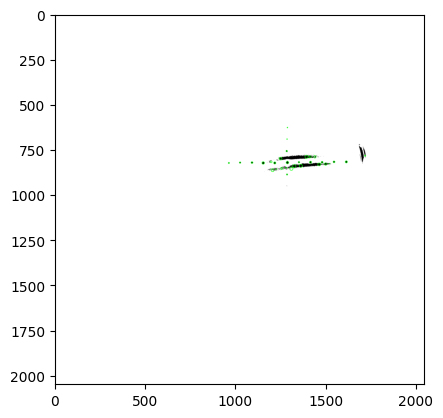

In [17]:
res, _ = find_dots(read_img(get_list_of_imgs("data/test")[0]))
plt.imshow(res)
cv2.imwrite("data/test/dots.png", res)

data/test/8_11.tiff


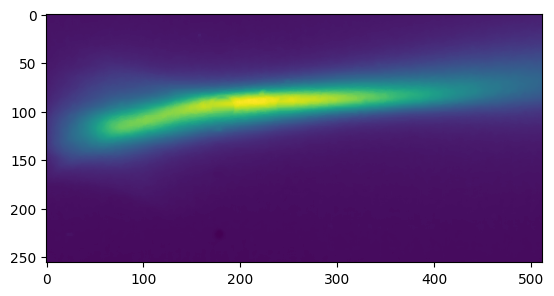

In [30]:
print(get_list_of_imgs("data/test")[0])
# 369, 736
img = read_img(get_list_of_imgs("data/test")[0])
original = img / 16 / 4095
prepr = dataset.preprocess_image(img)
dots = dataset.find_dots([prepr])
res = dataset.remove_dots(prepr, dots)
dots_img, _ = find_dots(read_img(get_list_of_imgs("data/test")[0]))
cv2.imwrite("data/test/dots.png", dots_img[369:1369, 736:1736])
cv2.imwrite("data/test/original.png", original[369:1369, 736:1736]*255 )
cv2.imwrite("data/test/preprocessed.png", prepr[369:1369, 736:1736]*255)
cv2.imwrite("data/test/dots_removed.png", res[369:1369, 736:1736]*255)
cropped = crop_by_laser(res, (1166, 853))
cv2.imwrite("data/test/cropped.png", cropped*255)
plt.imshow(cropped)


In [129]:
def find_laser(images):
    sum_imgs = np.zeros_like(images[0], dtype=np.float64)
    for img in images:
        # I_filtered = cv2.medianBlur(img, 5)
        # I_norm = I_filtered / 16 / 4095
        sum_imgs += img
    max_index = np.argmax(sum_imgs)
    max_x = max_index % sum_imgs.shape[1]
    max_y = max_index // sum_imgs.shape[1]
    return max_x, max_y

1228 818


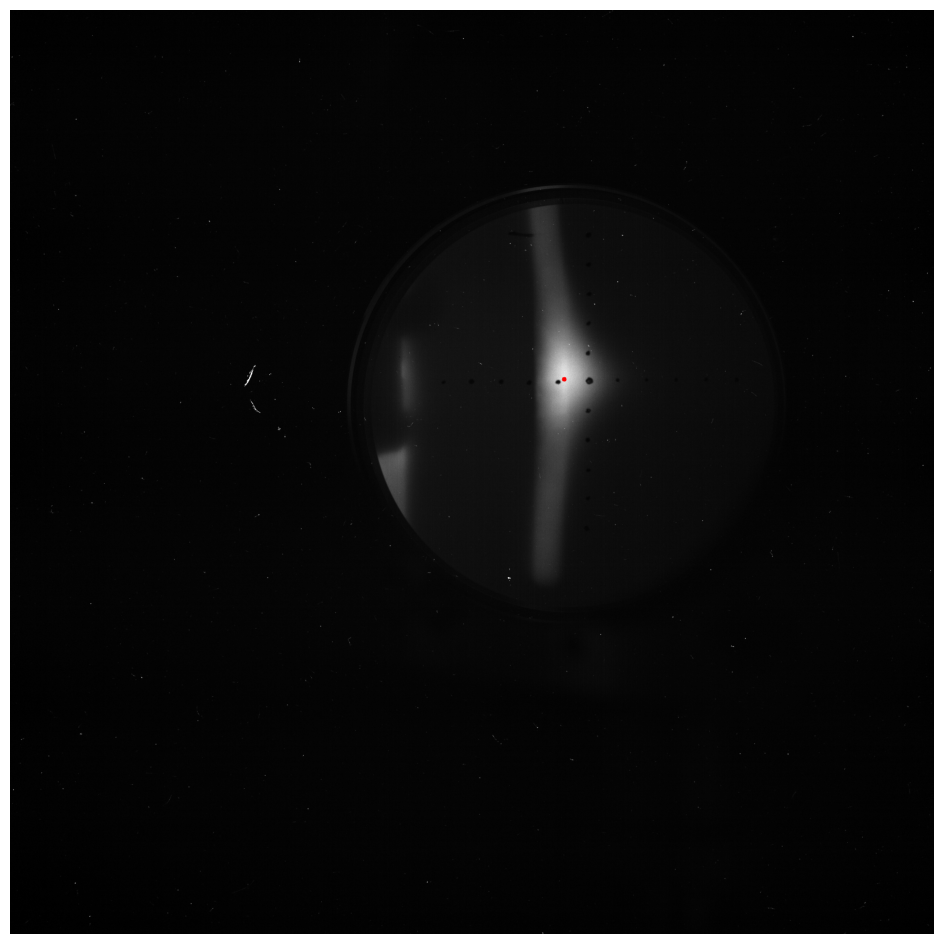

In [144]:
filenames = get_list_of_tiff('mag_out/22')
images = []
for file in filenames:
    img = read_img(file)
    img[780:840, 500:550] = 0
    img[1255:1262, 1101:1111] = 0
    img = cv2.medianBlur(img, 5)
    img = img / 16 / 4095
    images.append(img)
x, y = find_laser(images)
print(x, y)

file = filenames[79]
img = read_img(file)
img = img / 16 / 4095
img = img * 255
img = img.astype(np.uint8)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.circle(img, (x, y), 5, (0, 0, 255), -1)
# cv2.circle(img, (1111, 1262), 5, (0, 255, 0), -1)
im.plot_images(img)